<a href="https://colab.research.google.com/github/krahul2024/machine-learning/blob/main/tensors/tensors_two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')
%cd '/content/drive/My Drive/datasets'

Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/My Drive/datasets'
/content


# Bits of Regression
[Regression ](https://builtin.com/data-science/regression-machine-learning)

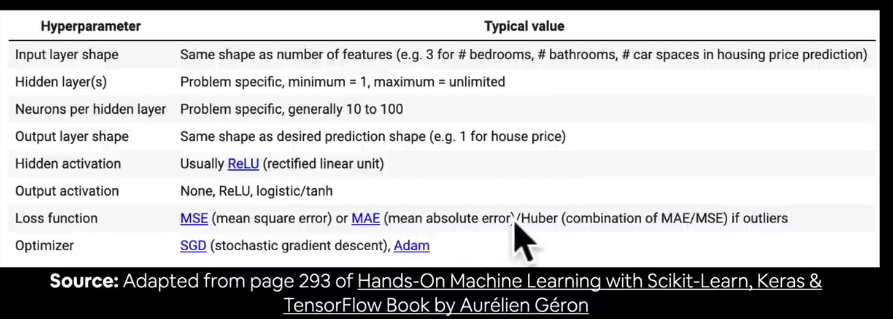
Source : Daniel Bourke deep learning fundamentals video.

Inputs/covariates/features/independent variables -> Details of related item for which we have to apply the model to predict , in case of house price prediction input is details of house

Outputs/dependent variables -> Predicted price

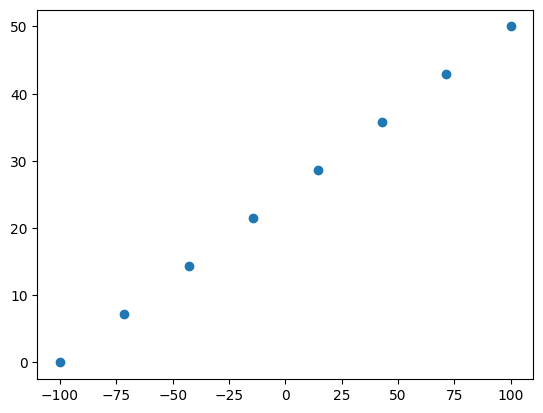

In [2]:
#  print(tf.__version__)
x = np.linspace(-100, 100, num = 8)  # create features
y = np.linspace(0,50,8) # labels
plt.scatter(x,y) # plotting

Applying the regression

In [3]:
y > x/ 2 - 1 # this shows the inequality

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [4]:
tensor_x = tf.constant(x)
tensor_y = tf.constant(y)
tensor_x, tensor_y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=
 array([-100.        ,  -71.42857143,  -42.85714286,  -14.28571429,
          14.28571429,   42.85714286,   71.42857143,  100.        ])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=
 array([ 0.        ,  7.14285714, 14.28571429, 21.42857143, 28.57142857,
        35.71428571, 42.85714286, 50.        ])>)

### Steps in modelling with tf
* Creating a model : define the input and output layers , as well as hidden layers of a deep learning model.
* Compiling a model : define the loss function ( in other words , the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns of its learning) and evaluation metrics(what we can use to interpret the performance of our model).
* Fitting a model : letting the model try to find patterns between x and y, features and labels.

In [5]:
tf.random.set_seed(50)
# building the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compiling the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = tf.keras.metrics.MAE
)

# fitting the model or letting the model learn about patterns are get ready for prediction
model.fit(
    tf.expand_dims(tensor_x, axis = -1),
    tensor_y,
    epochs = 8
)

model.predict([100, 75])

Epoch 1/8
1/1 [==============================] - 1s 654ms/step - loss: 34.9142 - mean_absolute_error: 34.9142
Epoch 2/8
1/1 [==============================] - 0s 13ms/step - loss: 24.9950 - mean_absolute_error: 24.9950
Epoch 3/8
1/1 [==============================] - 0s 15ms/step - loss: 24.9850 - mean_absolute_error: 24.9850
Epoch 4/8
1/1 [==============================] - 0s 13ms/step - loss: 24.9750 - mean_absolute_error: 24.9750
Epoch 5/8
1/1 [==============================] - 0s 16ms/step - loss: 24.9650 - mean_absolute_error: 24.9650
Epoch 6/8
1/1 [==============================] - 0s 16ms/step - loss: 24.9550 - mean_absolute_error: 24.9550
Epoch 7/8
1/1 [==============================] - 0s 18ms/step - loss: 24.9450 - mean_absolute_error: 24.9450
Epoch 8/8
1/1 [==============================] - 0s 110ms/step


array([[34.51761 ],
       [25.906956]], dtype=float32)

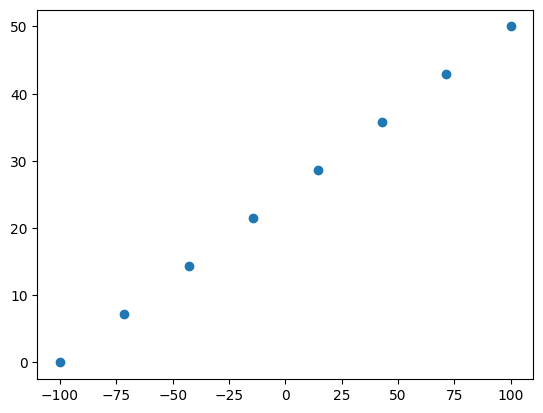

In [6]:
plt.scatter(
    tensor_x,
    tensor_y
)

In [7]:
model.predict([100, 75]) # not at all accurate as for 100 the value should be around 50 and for 75 it should be around 35

1/1 [==============================] - 0s 38ms/step


array([[34.51761 ],
       [25.906956]], dtype=float32)

### Training and Testing on larger data

[-100.   -97.5  -95.   -92.5  -90.   -87.5  -85.   -82.5  -80.   -77.5
  -75.   -72.5  -70.   -67.5  -65.   -62.5  -60.   -57.5  -55.   -52.5
  -50.   -47.5  -45.   -42.5  -40.   -37.5  -35.   -32.5  -30.   -27.5
  -25.   -22.5  -20.   -17.5  -15.   -12.5  -10.    -7.5   -5.    -2.5
    0.     2.5    5.     7.5   10.    12.5   15.    17.5   20.    22.5
   25.    27.5   30.    32.5   35.    37.5   40.    42.5   45.    47.5
   50.    52.5   55.    57.5   60.    62.5   65.    67.5   70.    72.5
   75.    77.5   80.    82.5   85.    87.5   90.    92.5   95.    97.5] 
 [-80.  -77.5 -75.  -72.5 -70.  -67.5 -65.  -62.5 -60.  -57.5 -55.  -52.5
 -50.  -47.5 -45.  -42.5 -40.  -37.5 -35.  -32.5 -30.  -27.5 -25.  -22.5
 -20.  -17.5 -15.  -12.5 -10.   -7.5  -5.   -2.5   0.    2.5   5.    7.5
  10.   12.5  15.   17.5  20.   22.5  25.   27.5  30.   32.5  35.   37.5
  40.   42.5  45.   47.5  50.   52.5  55.   57.5  60.   62.5  65.   67.5
  70.   72.5  75.   77.5  80.   82.5  85.   87.5  90.   92.5  95

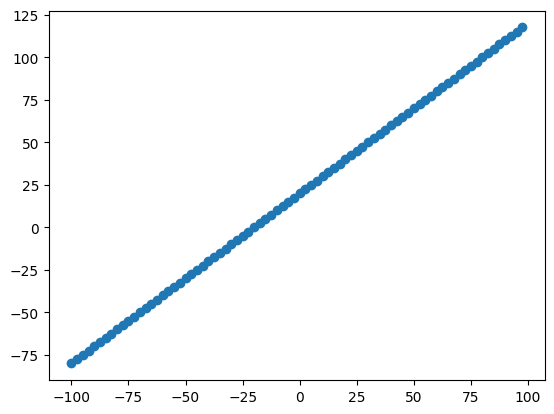

In [8]:
tensor_x = np.arange(-100, 100, 2.5)  # this is for creating array in range with some difference
tensor_y = np.arange(-80,120,2.5)
print(tensor_x, '\n', tensor_y)
plt.scatter(
    tensor_x,
    tensor_y
)

The equation should be something like this
y = x + 20

Splitting the dataset into training and testing

In [9]:
len(tensor_x)

80

In [10]:
# shuffling the data
indices = np.arange(len(tensor_x))
np.random.shuffle(indices)
# assigning the shuffled indexes to both the arrays
tensor_x = tensor_x[indices]
tensor_y = tensor_y[indices]

train_size = 63
x_train = tensor_x[:train_size]
y_train = tensor_y[:train_size]

x_test = tensor_x[train_size:]
y_test = tensor_y[train_size:]

len(x_train), len(y_train)

(63, 63)

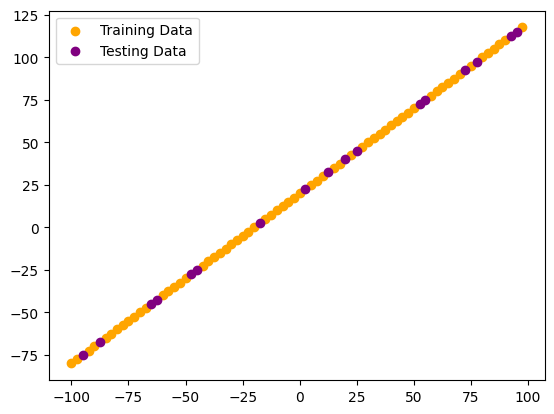

In [11]:
plt.scatter(x_train, y_train, c = 'orange',  label = 'Training Data')
plt.scatter(x_test, y_test, c = 'purple', label = 'Testing Data')
plt.legend()

In [12]:
tf.random.set_seed(42)

# creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1]),  # Dense(# no_of_neurons, input_shape)
    tf.keras.layers.Dense(1, input_shape = [1]) # adding one more layer
])

# compiling the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = tf.keras.metrics.MAE
)
# Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/1 [==============================] - 0s 65ms/step


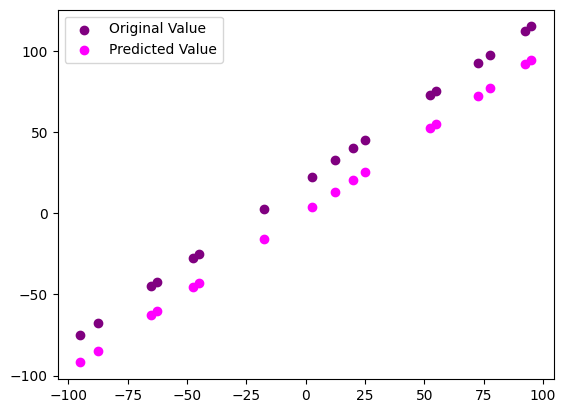

In [13]:
model.fit(x_train, y_train, epochs = 30, verbose = 0) # training the model
y_pred = model.predict(x_test)

plt.scatter(x_test, y_test, c = 'purple', label =  'Original Value' )
plt.scatter(x_test, y_pred, c = 'magenta', label =  'Predicted Value')
plt.legend()

Plotting the model

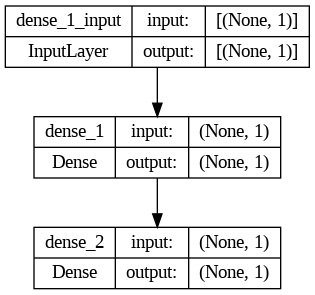

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

#### Evaluating Predictions

In [15]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 192ms/step - loss: 18.9760 - mean_absolute_error: 18.9760


[18.976041793823242, 18.976041793823242]

In [16]:
# calculating mean absolute error
mae = tf.metrics.mean_absolute_error(
    y_true = y_test,
    y_pred = y_pred
)
mae

<tf.Tensor: shape=(17,), dtype=float32, numpy=
array([ 56.923653,  54.285877,  62.684196,  62.944164,  87.706985,
        72.67114 ,  89.57917 ,  53.787655,  57.31017 ,  57.64372 ,
        74.84401 ,  74.16261 ,  76.473915, 116.905426,  55.582   ,
        64.8944  , 109.56073 ], dtype=float32)>

In [17]:
y_test.shape, y_pred.shape

((17,), (17, 1))

In [18]:
# squeezing the y_pred to match the shape of y_test
y_pred.squeeze().shape

(17,)

In [19]:
mae = tf.metrics.mean_absolute_error(y_true = y_test , y_pred = y_pred)
mae

<tf.Tensor: shape=(17,), dtype=float32, numpy=
array([ 56.923653,  54.285877,  62.684196,  62.944164,  87.706985,
        72.67114 ,  89.57917 ,  53.787655,  57.31017 ,  57.64372 ,
        74.84401 ,  74.16261 ,  76.473915, 116.905426,  55.582   ,
        64.8944  , 109.56073 ], dtype=float32)>

# Using Medical Cost dataset

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [21]:
med_url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
medical_data = pd.read_csv(med_url)
medical_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


#### Converting categorical data to numerical data

Using one-hot encoding to convert categorical-data to numerical data, the approach used is one-hot encoding.

In [22]:
# getting one hot encoded columns
medical_one_hot = pd.get_dummies(medical_data)
input_shape = [medical_one_hot.shape[1] - 1]
input_shape

[11]

In [23]:
x = medical_one_hot.drop('charges', axis = 1) # dropping the target variable
y = medical_one_hot['charges']
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(
    x, y,
    test_size = 0.18,
    train_size = 0.82,
    random_state = 42 # this is for same results over and over again
)

x_train.shape

(1097, 11)

In [25]:
tf.random.set_seed(42) # random seed = 42 is for reproducible results

# create new model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# compilling the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = tf.keras.metrics.MAE
)

# training the model
model.fit(
    x_train,
    y_train,
    epochs = 100,
    verbose = 0
)


In [26]:
model.evaluate(
    x_valid,
    y_valid
)

8/8 [==============================] - 0s 3ms/step - loss: 8084.5405 - mean_absolute_error: 8084.5405


[8084.54052734375, 8084.54052734375]

Using a bigger model

Plotting the losses over iterations/epochs


Text(0, 0.5, 'Loss')

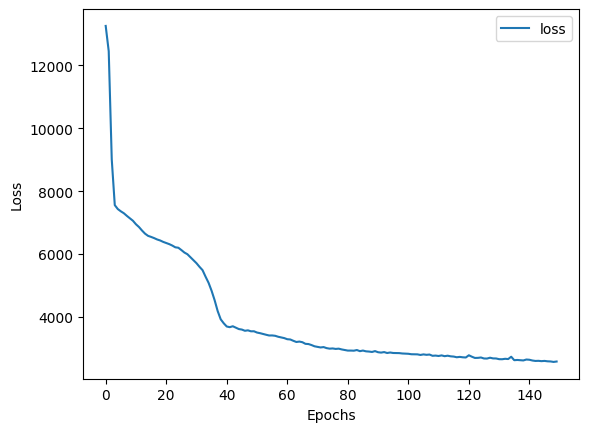

In [27]:
from tensorflow import keras
from tensorflow.keras import layers

# Creating the model
model = keras.Sequential([
    layers.Dense(
        units = 120,
        activation = 'relu',
        input_shape = input_shape
    ),
    layers.Dense(
        units = 120,
        activation = 'relu'
    ),
    layers.Dense(
        units = 50,
        activation = 'relu'
    ),
    layers.Dense(
        units = 1,
    )
])

# compiling  the model
model.compile(
    optimizer = 'adam',  # instead of SGD
    loss = 'mae'
)
# training the model
history = model.fit(
    x_train,
    y_train,
    epochs = 150,
    verbose = 0,
)
print('Plotting the losses over iterations/epochs')
pd.DataFrame(history.history).plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')

While training the model , we don't know when the model should stop, so to monitor this we can use `tf.keras.callbacks.EarlyStopping`  so it stops automatically when there is no significant improvement or no improvement at all.

Evaluation of the model

In [28]:
eval_result = model.evaluate(
    x_valid,
    y_valid
)

eval_result

8/8 [==============================] - 0s 2ms/step - loss: 2333.6113


2333.611328125

Extra training of the model

Text(0, 0.5, 'Loss')

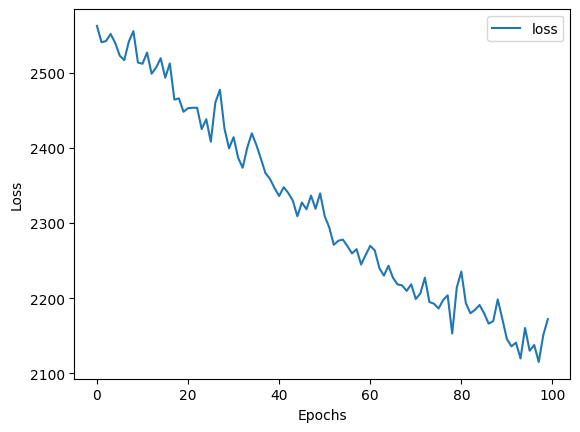

In [29]:
history = model.fit(
    x_train,
    y_train,
    epochs = 100,
    verbose = 0
)

pd.DataFrame(history.history).plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')


In [30]:
eval_result = model.evaluate(
    x_valid,
    y_valid
)
eval_result

8/8 [==============================] - 0s 6ms/step - loss: 1943.3929


1943.3929443359375

All the data which is passed to neural nets should be in the range(0,1), this can be done using *Normalization*.
There is another method called *Standardization*  to convert all the data to unit variance and 0 mean.

Steps in pre-processing
* making sure all the data is in form of numbers, if not then convert it.
* making sure if the data is in right shape.
* Feature Scaling
    * Normalizing the data to make it between range(0,1). One of the ways is min-max scaling.
    * Standardization : making sure that all the values have a mean of 0 and variance of 1.

In context to neural networks , we prefer values between 0-1, so *normalization* is a go to method.



# Normalization and Standardization

In [31]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
med_url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
med_data = pd.read_csv(med_url)
med_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# creating column transformer , which helps in normalization of the data
col_transformer = make_column_transformer(
    # for handling numerical data
    (
        MinMaxScaler(),
        [ 'age', 'bmi', 'children']
    ),
    # for handling categorical data , this involves encoding and then normalization
    (
        OneHotEncoder(handle_unknown = 'ignore'),
        ['sex', 'smoker', 'region']
    )
)

x = med_data.drop('charges', axis = 1)
y = med_data['charges']

# splitting the dataset
x_train, x_valid, y_train, y_valid = train_test_split(
    x, y,
    test_size = 0.18,
    train_size = .82,
    random_state = 42
)

col_transformer.fit(x_train) # fitting column transformer only on the training data
# if the fitting is done on test data this would result in data leakage.

# normalizing the data both test and training
x_train_normal = col_transformer.transform(x_train)
x_valid_normal = col_transformer.transform(x_valid)


In [33]:
x_train.loc[0]  # getting the first row

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [34]:
x_train_normal.shape, x_train.shape # we will see increase in no. of columns in normalized version because we have one-hot encoded the categorical values

((1097, 11), (1097, 6))

[11]


Text(0, 0.5, 'Loss')

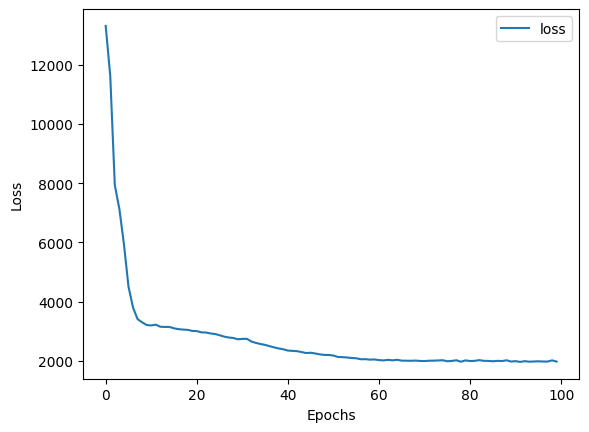

In [46]:
from tensorflow import keras
from keras import Sequential, layers

input_shape = [x_train_normal.shape[1]]
print(input_shape)

# creating the model
model_one = Sequential([
    layers.Dense(
        units = 240,
        activation = 'relu',
        input_shape = input_shape
    ),
    layers.Dense(
        units = 240,
        activation = 'relu'
    ),
    layers.Dense(
        units = 160,
        activation = 'relu'
    ),
    layers.Dense(
        units = 80,
        activation = 'relu'
    ),
    layers.Dense(
        units = 1
    )
])

# compile the model
model_one.compile(
    optimizer = 'adam',
    loss = 'mae'
)

# fit the model for 100 epochs
history = model_one.fit(
    x_train_normal,
    y_train,
    epochs = 100,
    verbose = 0
)

pd.DataFrame(history.history).plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [48]:
model_one.evaluate(x_valid_normal, y_valid)

8/8 [==============================] - 0s 4ms/step - loss: 1726.6498


1726.6497802734375